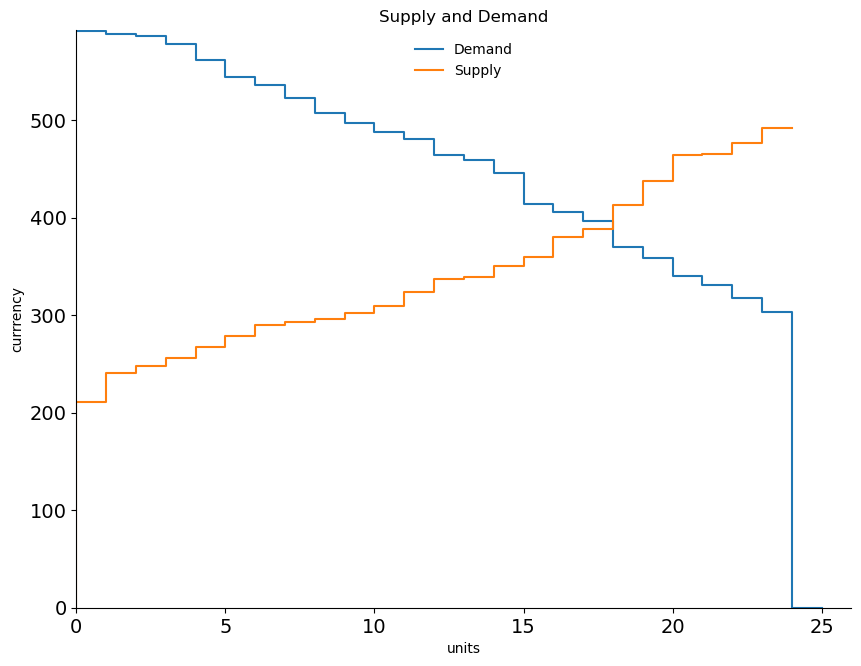

,contract_id,bid_id,ask_id,buyer_id,seller_id,placed_location,accept_location,property_right,item_type,currency_type,price,agent_id,round,period,week,barg_location
0,0,8,None,T_2_ZID,T_6_ZID,"(0, 0)","(0, 0)",SPOT,X,M,370,T_6_ZID,0,0,0,"(0, 0)"
1,1,None,9,T_6_ZID,T_2_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,284,T_6_ZID,0,0,0,"(0, 0)"
2,2,None,0,T_3_ZID,T_8_ZID,"(0, 0)","(0, 0)",SPOT,X,M,432,T_3_ZID,0,0,0,"(0, 0)"
3,3,3,None,T_6_ZID,T_1_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,565,T_1_ZID,0,0,0,"(0, 0)"
4,4,30,None,T_3_ZID,T_6_ZID,"(0, 0)","(0, 0)",SPOT,X,M,472,T_6_ZID,1,0,0,"(0, 0)"
5,5,25,None,T_8_ZID,T_2_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,531,T_2_ZID,1,0,0,"(0, 0)"
6,6,None,15,T_5_ZID,T_4_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,386,T_5_ZID,1,0,0,"(0, 0)"
7,7,1,None,T_8_ZID,T_3_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,373,T_3_ZID,1,0,0,"(0, 0)"
8,8,7,None,T_5_ZID,T_1_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,361,T_1_ZID,2,0,0,"(0, 0)"
9,9,None,37,T_7_ZID,T_2_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,391,T_7_ZID,2,0,0,"(0, 0)"


In [1]:
import random as rnd
import operator
import os
import time
import copy
import sys

# Data processing
import numpy as np                              # import numpy
import pandas as pd
import json

# Plotting
import matplotlib.pyplot as plt                 # import matplotlib
import seaborn as sns
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.ticker as tckr

# Custom packages for simulation
# This works only if notebooks folder is in the "modules" parent folder
sys.path.insert(0, '..') # add modules folder (parent folder) into this notebook's path
import institutions.dm_bargain as dm_bargain
import institutions.dm_travel as dm_travel
import environment.dm_agents as dm_agents
import environment.dm_env as env
import dm_utils as dm
import simulations.dm_sim_period as simulate
import dm_process_results as results
import environment.env_make_agents as make_env
#TODO: Change imported name, propagate

# Agent Types
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer
trader_types = [(ZID, 4), (ZID, 4)]     
grid_size = 1     # Grid is grid_size x grid_size
num_traders = 8   # traders (multiple of two) 
num_units = 6     # Number of units per trader
lower_bound = 200 # lower bound on values or costs
upper_bound = 600 # upper bound on values or costs
debug = False

# Circular market type
m_type = "TWO_TYPE"
i_types = ["X","Y"]
b_type = "ABSTRACT"
agent_maker = make_env.MakeAgents(num_traders, trader_types, num_units, 
                                grid_size, lower_bound, upper_bound, debug, market_type=m_type, item_types=i_types)
#agent_maker.make_test_agents()
agent_maker.make_agents()
agent_maker.make_locations()
agents = agent_maker.get_agents()
#agent_maker.print_agents(agents)

# set up market
agent_maker.make_market("test_market")
agent_maker.plot_market()
market = agent_maker.get_market()

sim_name = "Sample One Period Simulation"
num_rounds = 10
num_periods = 1
plot_on = False
debug = False


big_contracts = pd.DataFrame()
sim_agents = copy.deepcopy(agents)
sim1 = simulate.SimPeriod(sim_name, num_rounds, sim_agents, 
                market, grid_size, debug, plot_on, market_type=m_type, item_types=i_types, bidding_type=b_type)
for period in range(num_periods):
    sim1.run_period()
    big_contracts = pd.concat([big_contracts, sim1.get_contracts()])

print()
contracts = sim1.get_contracts()
contracts

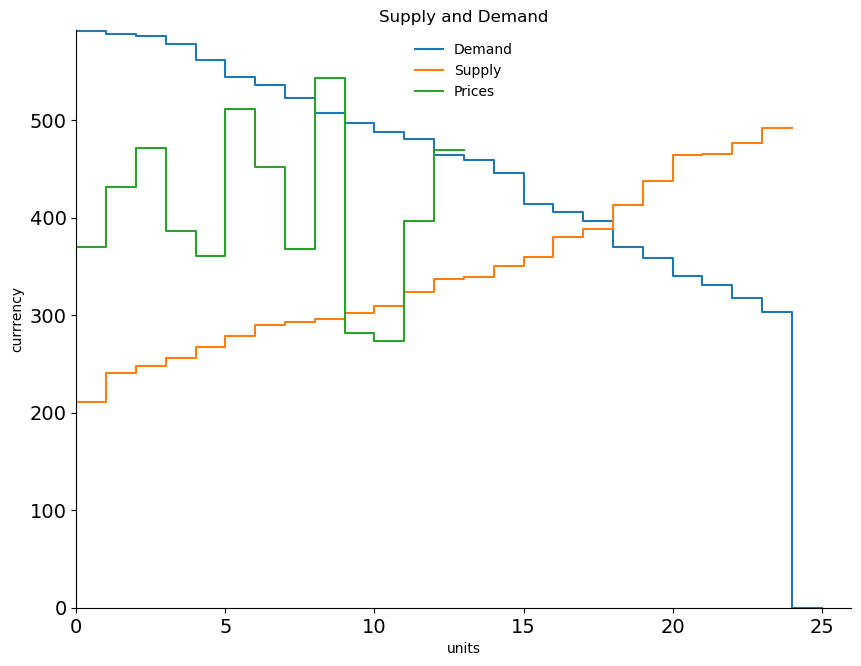

TWO_TYPE ['X', 'Y'] TRADER
{'X': 16, 'Y': 20} {'X': 396, 'Y': 390} {'X': 408, 'Y': 390} {'X': 3044, 'Y': 4201}
{'X': 16, 'Y': 20} {'X': 396, 'Y': 390} {'X': 408, 'Y': 390} {'X': 3044, 'Y': 4201}
TWO_TYPE ['X', 'Y'] TRADER
{'X': 16, 'Y': 20} {'X': 396, 'Y': 390} {'X': 408, 'Y': 390} {'X': 3044, 'Y': 4201}
{'X': 16, 'Y': 20} {'X': 396, 'Y': 390} {'X': 408, 'Y': 390} {'X': 3044, 'Y': 4201}
      equilibrium price range is 393.0 to 399.0
      average price = 409.15384615384613
      equilibrium expected contracts = 18.0, actual contracts = 13
      buyer surplus = 1090.5, seller surplus = 1711.5
      actual_surplus = 2802.0, maximum surplus = 3622.5
      efficiency = 77.57%.



/Users/alex/Repos/dm_markets/modules_v3/notebooks/../dm_process_results.py:160: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.item_eff_df = pd.concat([self.item_eff_df, item1df]).reset_index(drop=True)


In [2]:
pr_1 = results.ProcessResults(market, sim_name, agents, contracts, debug, market_type=m_type, item_types=i_types)
pr_1.plot_prices()

pr_1.get_results()
pr_1.display_results()

In [ ]:
 # TODO see if need to cnacel contracts after each round of bidding and restart bidding from scratch